# Caption Providers

This notebook compares the default large model whisper settings with the results we saw from Google Speech and Amazon Transcribe.

In [15]:
import pandas

output_dir = 'output-2024-07-05'

aws = pandas.read_csv(f'../docs/{output_dir}/report-aws.csv', index_col='druid')
gcp = pandas.read_csv(f'../docs/{output_dir}/report-google.csv', index_col='druid')
whisper = pandas.read_csv(f'../docs/{output_dir}/report-whisper.csv', index_col='druid')

Limit whisper results to the best options we found for the Large model:

In [16]:
whisper = whisper[whisper['options'] == "{'model_name': 'large', 'beam_size': 5, 'patience': 1.0, 'condition_on_previous_text': False, 'best_of': 5}"]
whisper

,run_id,file,language,transcript_filename,transcript_language,runtime,wer,mer,wil,wip,hits,substitutions,insertions,deletions,diff,options
druid,,,,,,,,,,,,,,,,
bb158br2509,bb158br2509-whisper-019,bb158br2509_sl.m4a,en,bb158br2509_script.txt,en,323.365434,0.058733,0.058257,0.081121,0.918879,4300,106,37,123,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'large', 'beam_size': 5, 'patie..."
bg405cn7261,bg405cn7261-whisper-067,bg405cn7261_v2_sl.mp4,en,bg405cn7261_v2_sl_script.txt,en,131.811330,0.022380,0.022114,0.031211,0.968789,1813,17,22,2,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'large', 'beam_size': 5, 'patie..."
br525sp8033,br525sp8033-whisper-115,br525sp8033_FV4289_v4_sl.mp4,ru,br525sp8033_FV4289_v4_sl_rus_script.txt,ru,40.951452,0.156028,0.154386,0.234346,0.765654,241,25,3,16,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'large', 'beam_size': 5, 'patie..."
bw689yg2740,bw689yg2740-whisper-163,bw689yg2740_sl.mp4,en,bw689yg2740_script.txt,en,861.845510,0.104076,0.099754,0.135839,0.864161,10622,433,490,254,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'large', 'beam_size': 5, 'patie..."
fh290wd1772,fh290wd1772-whisper-211,fh290wd1772_v2_sp_sl.m4a,en,fh290wd1772_v2_sp_sl_script.txt,en,25.562662,0.290698,0.288184,0.386326,0.613674,247,39,3,58,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'large', 'beam_size': 5, 'patie..."
gj097zq7635,gj097zq7635-whisper-259,gj097zq7635_a_sl.m4a,en,gj097zq7635_a_sl_script.txt,en,564.136517,0.098555,0.095637,0.135775,0.864225,6903,315,226,189,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'large', 'beam_size': 5, 'patie..."
gk220dt2833,gk220dt2833-whisper-307,gk220dt2833_Ali_Shan_10of10_sl.mp4,en,gk220dt2833_Ali_Shan_10of10_sl_script.txt,en,72.260673,0.089005,0.087105,0.120658,0.879342,1069,40,25,37,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'large', 'beam_size': 5, 'patie..."
gn213vd3845,gn213vd3845-whisper-355,gn213vd3845_ev_1_sl.mp4,es,gn213vd3845_ev_1_sl_spa_script.txt,es,50.083536,0.235387,0.234277,0.293067,0.706933,487,40,3,106,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'large', 'beam_size': 5, 'patie..."
kp010zv7055,kp010zv7055-whisper-403,kp010zv7055_a_sl.m4a,en,kp010zv7055_a_sl_script.txt,en,113.332467,0.954259,0.952756,0.997531,0.002469,30,544,1,60,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'large', 'beam_size': 5, 'patie..."


In [21]:
df = pandas.DataFrame({
    'aws': aws.wer,
    'gcp': gcp.wer,
    'whisper': whisper.wer,
})
df

,aws,gcp,whisper
druid,,,
bb158br2509,0.066681,0.204902,0.058733
bc962wz7181,0.712598,0.848773,0.615563
bg405cn7261,0.062227,0.102620,0.022380
bh446wm7842,NaN,NaN,0.677650
br525sp8033,0.198582,0.195035,0.156028
bw689yg2740,0.190291,0.219471,0.104076
fh290wd1772,0.854651,0.860465,0.290698
gj097zq7635,0.152153,0.379641,0.098555
gk220dt2833,0.138743,0.328970,0.089005


Weird, we seem to be missing results for qf378nj5000 in GCP? We will need to rerun this. For now it will be dropped.

In [22]:
df = df.dropna()
df

,aws,gcp,whisper
druid,,,
bb158br2509,0.066681,0.204902,0.058733
bc962wz7181,0.712598,0.848773,0.615563
bg405cn7261,0.062227,0.102620,0.022380
br525sp8033,0.198582,0.195035,0.156028
bw689yg2740,0.190291,0.219471,0.104076
fh290wd1772,0.854651,0.860465,0.290698
gj097zq7635,0.152153,0.379641,0.098555
gk220dt2833,0.138743,0.328970,0.089005
gn213vd3845,0.157978,0.398104,0.235387


Add Item Names from `sdr-data.csv`:

In [23]:
sdr_data = pandas.read_csv('../sdr-data.csv')
sdr_data = sdr_data[['Druid', 'Item Name']]
sdr_data.columns = ['druid', 'name']

df2 = pandas.merge(df.reset_index(), sdr_data, on='druid', how='left')
df2 = df2.set_index('name')
df2 = df2.drop(['druid'], axis=1)
df2

,aws,gcp,whisper
name,,,
Project South,0.066681,0.204902,0.058733
Interview with Yousif Elias Mtanes,0.712598,0.848773,0.615563
Copyright and FERPA,0.062227,0.102620,0.022380
USSR Exhibit,0.198582,0.195035,0.156028
Native American Research Forum,0.190291,0.219471,0.104076
I Don't Know Where I'm Goin' But I'm On My Way,0.854651,0.860465,0.290698
National Gay Rights Advocates,0.152153,0.379641,0.098555
Shan Oral History,0.138743,0.328970,0.089005
Viva Chile,0.157978,0.398104,0.235387


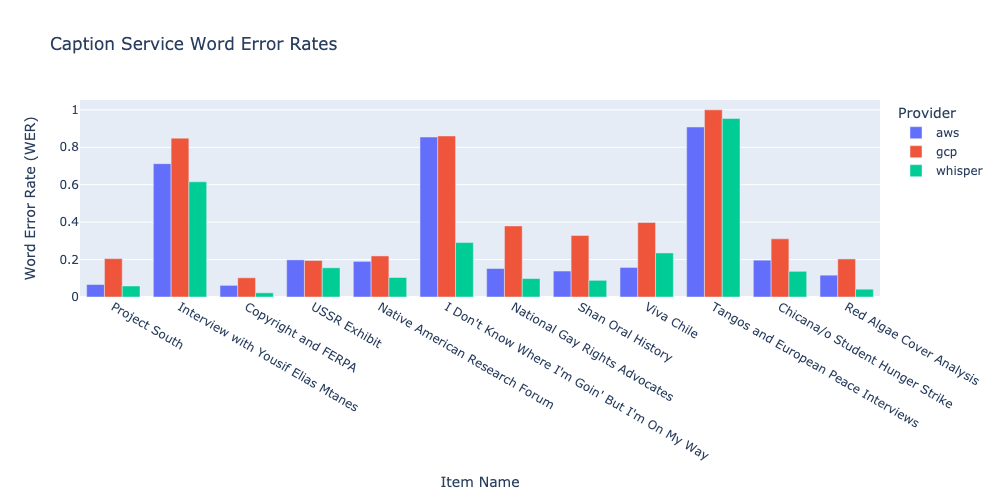

In [26]:
from plotly import express as xp

fig = xp.bar(
    df2,
    barmode='group',
    title='Caption Service Word Error Rates',
    labels={
        'value': 'Word Error Rate (WER)',
        'name': 'Item Name',
        'variable': 'Provider'
    },
    width=1000
)
fig.show('png')